=== АНАЛИЗ ТЕСТИРОВАНИЯ НОВОГО ПРОДУКТА ===

Процесс тестирования нового продукта:

1. Определение размера выборки
   - Расчет на основе текущего разброса прибыли
   - Учет минимального значимого эффекта (800 руб.)
   - Обеспечение мощности теста 80%

2. Формирование тестовой группы
   - Случайный отбор клиентов из целевой категории
   - Стратификация по текущему уровню прибыли
   - Проверка репрезентативности выборки

3. Проведение теста
   - Внедрение продукта в тестовой группе
   - Сбор данных в течение тестового периода
   - Мониторинг показателей

4. Анализ результатов
   - Статистический анализ (t-тест)
   - Оценка экономической значимости
   - Принятие решения о внедрении

=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ ===


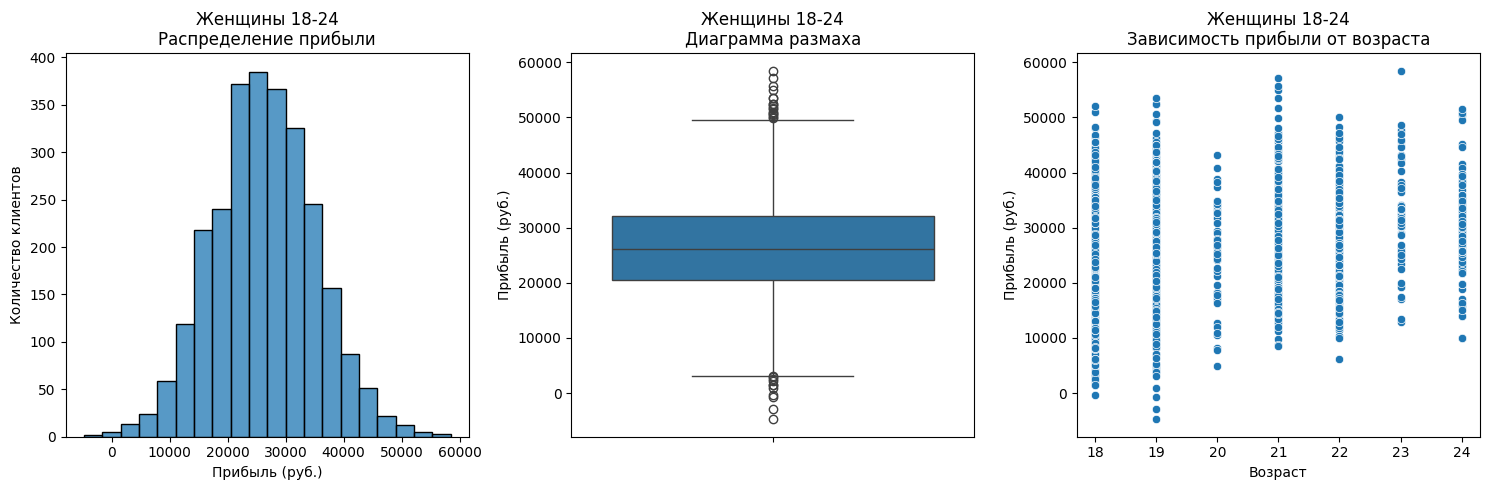


Подробная статистика для категории Женщины 18-24:
Количество клиентов: 2712
Средняя прибыль: 26278.37 руб.
Стандартное отклонение: 8834.42 руб.
Медианная прибыль: 26100.00 руб.
Необходимый размер выборки (на группу): 1915
Минимальный эффект для обнаружения: 800 руб.
Уровень значимости: 5%
Мощность теста: 80%


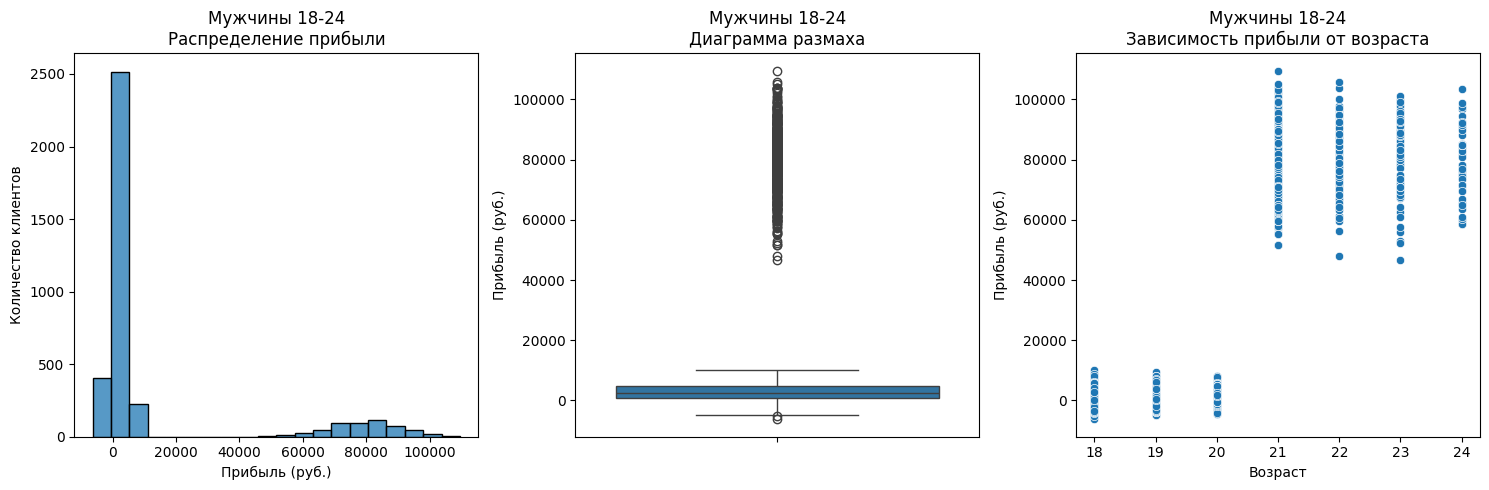


Подробная статистика для категории Мужчины 18-24:
Количество клиентов: 3679
Средняя прибыль: 13155.76 руб.
Стандартное отклонение: 27517.75 руб.
Медианная прибыль: 2500.00 руб.
Необходимый размер выборки (на группу): 18574
Минимальный эффект для обнаружения: 800 руб.
Уровень значимости: 5%
Мощность теста: 80%


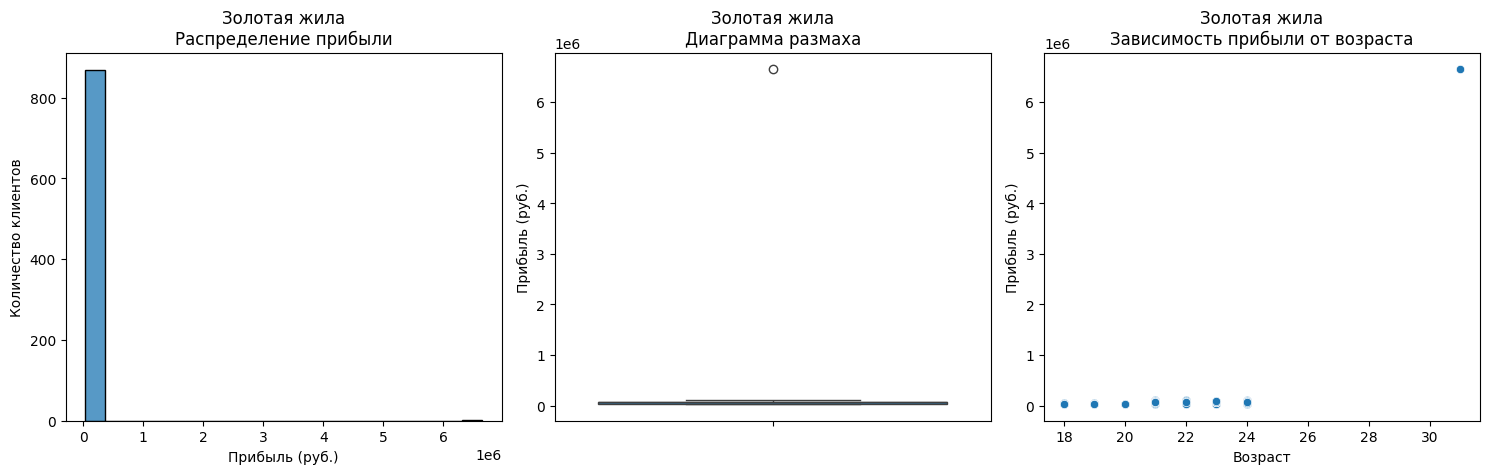


Подробная статистика для категории Золотая жила:
Количество клиентов: 869
Средняя прибыль: 71921.92 руб.
Стандартное отклонение: 224159.36 руб.
Медианная прибыль: 69550.00 руб.
Необходимый размер выборки (на группу): 1232457
Минимальный эффект для обнаружения: 800 руб.
Уровень значимости: 5%
Мощность теста: 80%


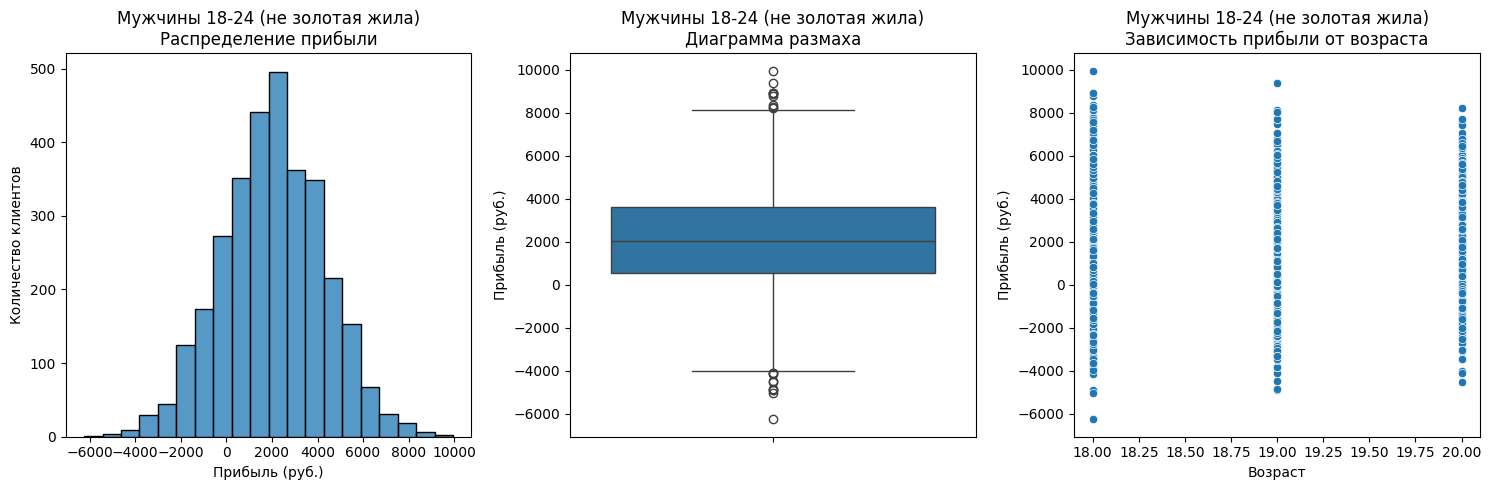


Подробная статистика для категории Мужчины 18-24 (не золотая жила):
Количество клиентов: 3150
Средняя прибыль: 2042.11 руб.
Стандартное отклонение: 2240.33 руб.
Медианная прибыль: 2050.00 руб.
Необходимый размер выборки (на группу): 124
Минимальный эффект для обнаружения: 800 руб.
Уровень значимости: 5%
Мощность теста: 80%

Сводный анализ:
                                                       категория  \
Женщины 18-24                                      Женщины 18-24   
Мужчины 18-24                                      Мужчины 18-24   
Золотая жила                                        Золотая жила   
Мужчины 18-24 (не золотая жила)  Мужчины 18-24 (не золотая жила)   

                                текущий_размер средняя_прибыль  \
Женщины 18-24                             2712    26278.373894   
Мужчины 18-24                             3679    13155.762435   
Золотая жила                               869    71921.921749   
Мужчины 18-24 (не золотая жила)           3150     2

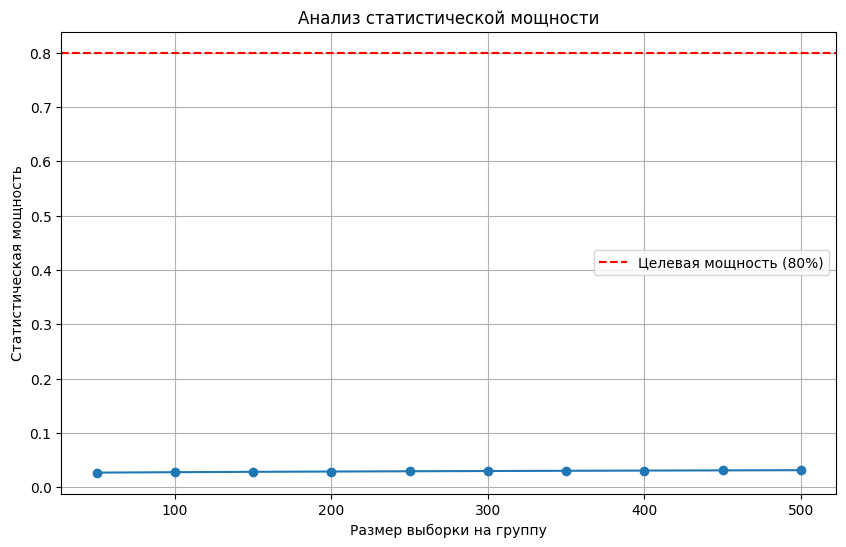


Сводный анализ:
                                                       категория  \
Женщины 18-24                                      Женщины 18-24   
Мужчины 18-24                                      Мужчины 18-24   
Золотая жила                                        Золотая жила   
Мужчины 18-24 (не золотая жила)  Мужчины 18-24 (не золотая жила)   

                                текущий_размер средняя_прибыль  \
Женщины 18-24                             2712    26278.373894   
Мужчины 18-24                             3679    13155.762435   
Золотая жила                               869    71921.921749   
Мужчины 18-24 (не золотая жила)           3150     2042.111111   

                                стандартное_отклонение размер_контрольной  \
Женщины 18-24                              8834.417916               1915   
Мужчины 18-24                             27517.753392              18574   
Золотая жила                             224159.357493            1232457   
Муж

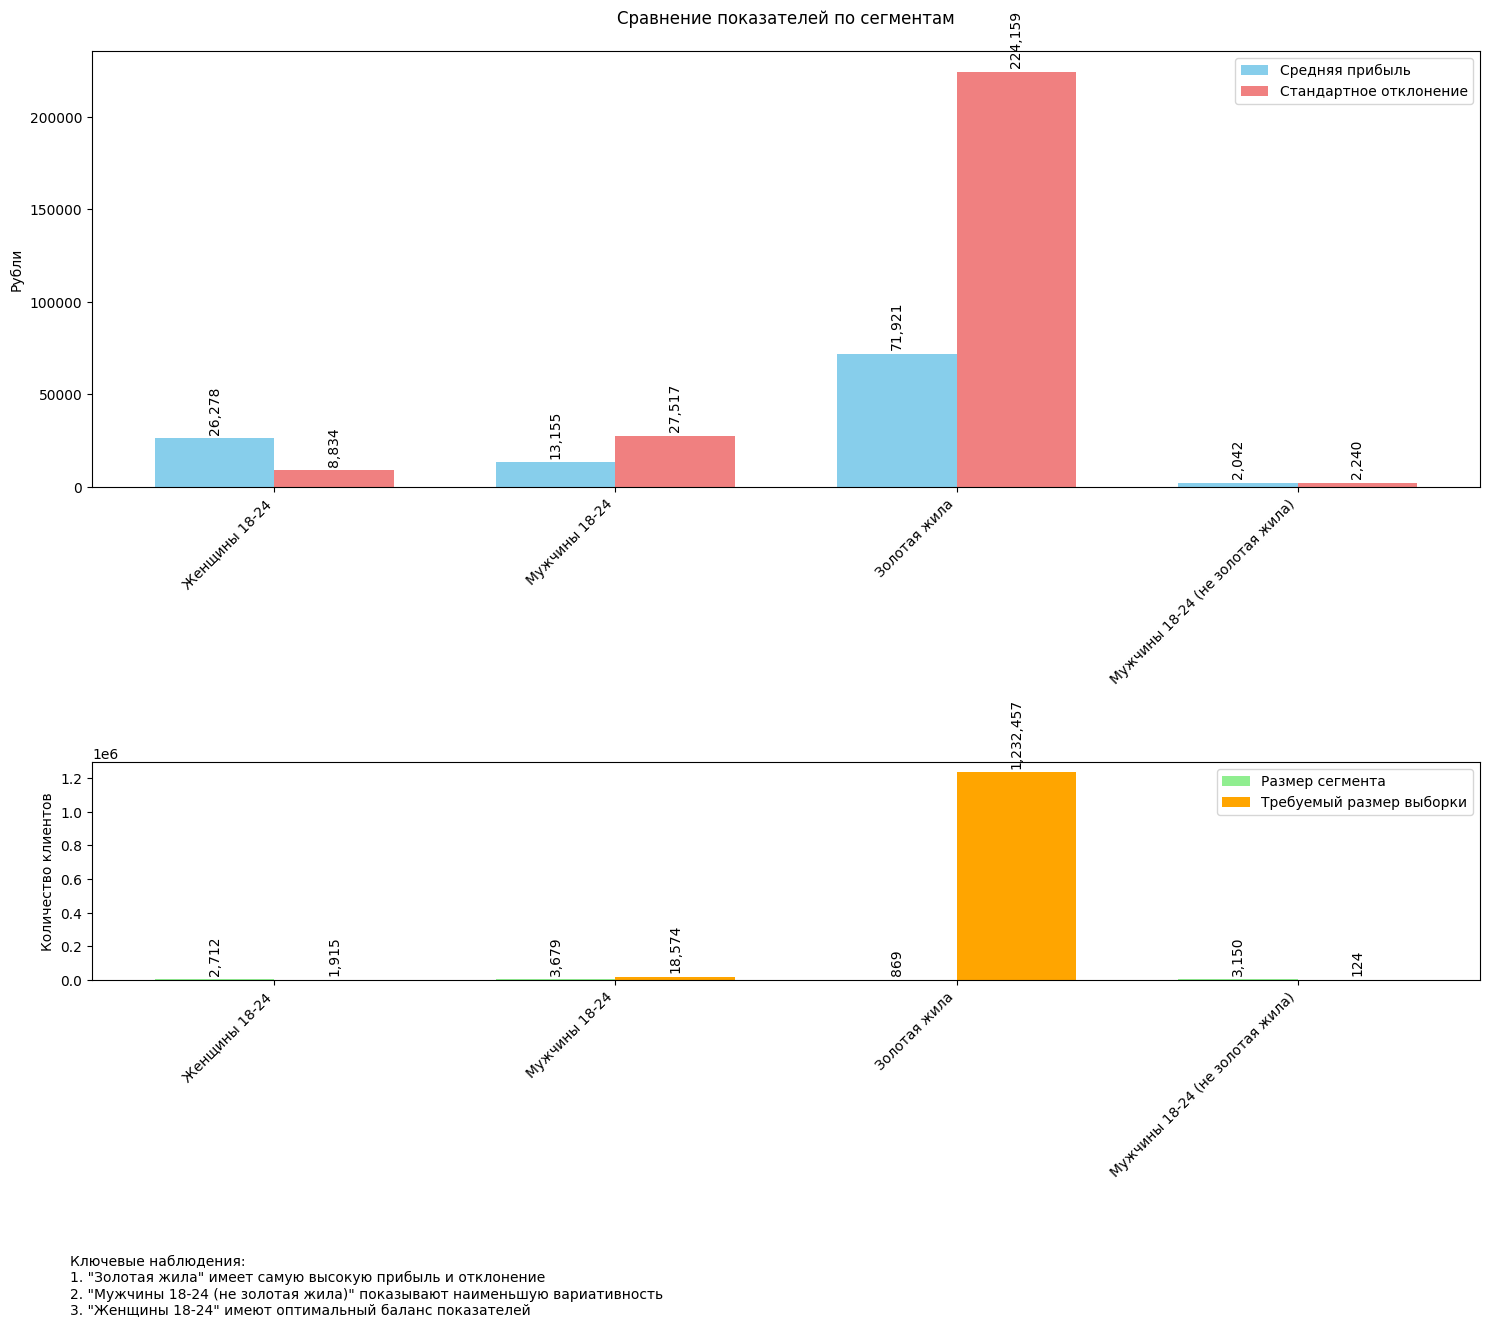

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import math

# Установка русского шрифта для графиков
plt.rcParams['font.family'] = 'DejaVu Sans'

# Пример данных
sample_data = '''Payments,Costs,Profit,Age,Gender,AgeGroup
9400,8100,1300,19,male,18-24
26600,13900,12700,29,male,25-39
9750,6750,3000,20,male,18-24
29700,11200,18500,18,female,18-24
49700,10450,39250,21,female,18-24
14300,7500,6800,18,male,18-24'''

def calculate_sample_size(
    std_dev: float,
    effect_size: float = 800,
    alpha: float = 0.05,
    power: float = 0.80,
    ratio: float = 1.0
) -> Tuple[int, int]:
    """
    Расчет необходимого размера выборки для двухвыборочного t-теста
    """
    d = effect_size / std_dev
    Z_alpha = stats.norm.ppf(1 - alpha/2)
    Z_beta = stats.norm.ppf(power)
    
    n2 = math.ceil((pow(Z_alpha + Z_beta, 2) * (1 + 1/ratio)) / pow(d, 2))
    n1 = math.ceil(n2 * ratio)
    
    return n1, n2

def analyze_category(data: pd.DataFrame, category_mask: pd.Series, category_name: str) -> dict:
    """
    Анализ категории и расчет необходимого размера выборки
    """
    category_data = data[category_mask]
    
    profit_stats = {
        'mean': category_data['Profit'].mean(),
        'std': category_data['Profit'].std(),
        'count': len(category_data)
    }
    
    control_size, treatment_size = calculate_sample_size(
        std_dev=profit_stats['std'],
        effect_size=800,
        alpha=0.05,
        power=0.80
    )
    
    return {
        'категория': category_name,
        'текущий_размер': profit_stats['count'],
        'средняя_прибыль': profit_stats['mean'],
        'стандартное_отклонение': profit_stats['std'],
        'размер_контрольной': control_size,
        'размер_тестовой': treatment_size,
        'общий_размер': control_size + treatment_size
    }

def plot_profit_distribution(data: pd.DataFrame, category_mask: pd.Series, title: str):
    """
    Визуализация распределения прибыли
    """
    category_data = data[category_mask]
    
    plt.figure(figsize=(15, 5))
    
    # Гистограмма
    plt.subplot(1, 3, 1)
    sns.histplot(data=category_data, x='Profit', bins=20)
    plt.title(f'{title}\nРаспределение прибыли')
    plt.xlabel('Прибыль (руб.)')
    plt.ylabel('Количество клиентов')
    
    # Ящик с усами
    plt.subplot(1, 3, 2)
    sns.boxplot(data=category_data, y='Profit')
    plt.title(f'{title}\nДиаграмма размаха')
    plt.ylabel('Прибыль (руб.)')
    
    # Диаграмма рассеяния
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=category_data, x='Age', y='Profit')
    plt.title(f'{title}\nЗависимость прибыли от возраста')
    plt.xlabel('Возраст')
    plt.ylabel('Прибыль (руб.)')
    
    plt.tight_layout()
    plt.show()

def main():
    """
    Основная функция анализа
    """
    df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')
    
    df['Gender'] = df['Gender'].str.lower()
    
    # Определение категорий
    women_18_24 = (df['Gender'] == 'female') & (df['AgeGroup'] == '18-24')
    men_18_24 = (df['Gender'] == 'male') & (df['AgeGroup'] == '18-24')
    golden_mine = df['Profit'] > df['Profit'].quantile(0.9)
    men_18_24_not_golden = men_18_24 & ~golden_mine
    
    categories = {
        'Женщины 18-24': women_18_24,
        'Мужчины 18-24': men_18_24,
        'Золотая жила': golden_mine,
        'Мужчины 18-24 (не золотая жила)': men_18_24_not_golden
    }
    
    results = {}
    for category_name, category_mask in categories.items():
        results[category_name] = analyze_category(df, category_mask, category_name)
        plot_profit_distribution(df, category_mask, category_name)
        
        category_data = df[category_mask]
        print(f"\nПодробная статистика для категории {category_name}:")
        print(f"Количество клиентов: {len(category_data)}")
        print(f"Средняя прибыль: {category_data['Profit'].mean():.2f} руб.")
        print(f"Стандартное отклонение: {category_data['Profit'].std():.2f} руб.")
        print(f"Медианная прибыль: {category_data['Profit'].median():.2f} руб.")
        print(f"Необходимый размер выборки (на группу): {results[category_name]['размер_контрольной']}")
        print(f"Минимальный эффект для обнаружения: 800 руб.")
        print(f"Уровень значимости: 5%")
        print(f"Мощность теста: 80%")
    
    # Создание сводной таблицы
    summary_df = pd.DataFrame(results).T
    print("\nСводный анализ:")
    print(summary_df.round(2))
    
    # Анализ мощности для разных размеров выборки
    sample_sizes = np.linspace(50, 500, 10, dtype=int)
    std_dev = df['Profit'].std()
    
    powers = [stats.norm.cdf(
        (np.sqrt(n/2) * 800 / std_dev) - stats.norm.ppf(0.975)
    ) for n in sample_sizes]
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, powers, marker='o')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Целевая мощность (80%)')
    plt.xlabel('Размер выборки на группу')
    plt.ylabel('Статистическая мощность')
    plt.title('Анализ статистической мощности')
    plt.grid(True)
    plt.legend()
    plt.show()
    summary_df = pd.DataFrame(results).T
    print("\nСводный анализ:")
    print(summary_df.round(2))
    
    # Построение сравнительного графика
    plot_comparison(results)

def simulate_ab_test(
    current_data: pd.DataFrame,
    effect_size: float = 800,
    n_simulations: int = 1000
) -> dict:
    """
    Симуляция А/Б теста
    """
    mean = current_data['Profit'].mean()
    std = current_data['Profit'].std()
    n1, n2 = calculate_sample_size(std)
    
    significant_tests = 0
    effect_detected = 0
    
    for _ in range(n_simulations):
        control = np.random.normal(mean, std, n1)
        treatment = np.random.normal(mean + effect_size, std, n2)
        
        t_stat, p_value = stats.ttest_ind(control, treatment)
        
        if p_value < 0.05:
            significant_tests += 1
            if t_stat > 0:
                effect_detected += 1
    
    return {
        'мощность': significant_tests / n_simulations,
        'правильное_направление': effect_detected / n_simulations,
        'размер_выборки_на_группу': n1
    }

def plot_comparison(results: dict):
    """
    Создание сравнительного графика показателей по сегментам
    """
    df = pd.DataFrame(results).T.reset_index()
    df.columns = ['Сегмент', 'категория', 'текущий_размер', 'средняя_прибыль', 
                 'стандартное_отклонение', 'размер_контрольной', 'размер_тестовой', 'общий_размер']
    
    # Создание подграфиков
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[2, 1])
    
    # Настройка стиля
    x = np.arange(len(df['Сегмент']))
    width = 0.35
    
    # Первый график: средняя прибыль и стандартное отклонение
    bars1 = ax1.bar(x - width/2, df['средняя_прибыль'], width, 
                    label='Средняя прибыль', color='skyblue')
    bars2 = ax1.bar(x + width/2, df['стандартное_отклонение'], width, 
                    label='Стандартное отклонение', color='lightcoral')
    
    ax1.set_title('Сравнение показателей по сегментам', pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['Сегмент'], rotation=45, ha='right')
    ax1.legend()
    ax1.set_ylabel('Рубли')
    
    # Добавление подписей значений
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', rotation=90)
    
    autolabel(bars1)
    autolabel(bars2)
    
    # Второй график: размер сегмента и требуемый размер выборки
    bars3 = ax2.bar(x - width/2, df['текущий_размер'], width, 
                    label='Размер сегмента', color='lightgreen')
    bars4 = ax2.bar(x + width/2, df['размер_контрольной'], width, 
                    label='Требуемый размер выборки', color='orange')
    
    ax2.set_xticks(x)
    ax2.set_xticklabels(df['Сегмент'], rotation=45, ha='right')
    ax2.legend()
    ax2.set_ylabel('Количество клиентов')
    
    def autolabel2(bars):
        for bar in bars:
            height = bar.get_height()
            ax2.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', rotation=90)
    
    autolabel2(bars3)
    autolabel2(bars4)
    
    # Настройка расположения
    plt.tight_layout()
    
    # Добавление текстового блока с выводами
    fig.text(0.05, -0.05, 
             'Ключевые наблюдения:\n' +
             '1. "Золотая жила" имеет самую высокую прибыль и отклонение\n' +
             '2. "Мужчины 18-24 (не золотая жила)" показывают наименьшую вариативность\n' +
             '3. "Женщины 18-24" имеют оптимальный баланс показателей',
             fontsize=10, va='top')
    
    plt.show()

def print_test_process():
    """
    Вывод описания процесса тестирования
    """
    print("\nПроцесс тестирования нового продукта:")
    print("\n1. Определение размера выборки")
    print("   - Расчет на основе текущего разброса прибыли")
    print("   - Учет минимального значимого эффекта (800 руб.)")
    print("   - Обеспечение мощности теста 80%")
    
    print("\n2. Формирование тестовой группы")
    print("   - Случайный отбор клиентов из целевой категории")
    print("   - Стратификация по текущему уровню прибыли")
    print("   - Проверка репрезентативности выборки")
    
    print("\n3. Проведение теста")
    print("   - Внедрение продукта в тестовой группе")
    print("   - Сбор данных в течение тестового периода")
    print("   - Мониторинг показателей")
    
    print("\n4. Анализ результатов")
    print("   - Статистический анализ (t-тест)")
    print("   - Оценка экономической значимости")
    print("   - Принятие решения о внедрении")

if __name__ == "__main__":
    print("=== АНАЛИЗ ТЕСТИРОВАНИЯ НОВОГО ПРОДУКТА ===")
    print_test_process()
    print("\n=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ ===")
    main()

# Presentation
https://docs.google.com/presentation/d/1o4aWxBEPihuwaDJHa58lGX9QeBHlq4vs1lrXwH-eMO0/edit?usp=sharing